In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# display all columns
pd.set_option('display.max_columns', None)
# display all rows
pd.set_option('display.max_rows', None)

# Preprocessing

We did some processing using Excel: </br>
- Categorize and label all questions based on the topics</br>
- Relabel dataset header with categorized questions</br>


# Data Cleaning for 2022 Survey Data

In [2]:
data_2022 = pd.read_excel("kaggle_survey_2022_2021_2020_responses_SB.xlsx", sheet_name= 'survey_2022')

## Clearing columns

In [3]:
row_to_check = 0

cols_to_drop = []

for column in data_2022.columns:
    # Check if the word is present in the cell at the specified row and column
    if data_2022.at[row_to_check, column] == "drop":
        cols_to_drop.append(column)

# Drop the selected columns
data2022 = data_2022.drop(columns=cols_to_drop)

In [4]:
# strip whitespace in column headers
data2022.columns = data2022.columns.str.strip()

## Clearing rows

### Removing 1st 3 rows of dataframe

In [5]:
questions = data2022.iloc[2]

columns = data2022.columns
columns = columns.str.replace(r'\d+', '', regex=True)
columns = columns.str.strip()

new_columns = []
i = 0
for dat in questions:
    new_name = columns[i]
    question_split = dat.split(' - ')

    if len(question_split) > 1:
        ans = question_split[-1].strip()
        new_name = new_name + ' - ' + ans
    new_columns.append(new_name)
    i += 1


data2022.columns = new_columns

data2022.columns

Index(['Time spent on survey', 'Age', 'Gender - Selected Choice', 'Location',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Coursera',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - edX',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Kaggle Learn Courses',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - DataCamp',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Fast.ai',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udacity',
       ...
       'Popular media sources for Data Science - Reddit (r/machinelearning, etc)',
       'Popular media sources for Data Science - Kaggle (notebooks, forums, etc)',
       'Popular media sources for Data Science - Course Forums

In [6]:
data2022= data2022.iloc[3:].reset_index(drop=True)

## Add year column to the dataframe

In [7]:
data2022['year'] = 2022

# Data Cleaning for 2021 Survey Data

In [8]:
data_2021 = pd.read_excel("kaggle_survey_2022_2021_2020_responses_SB.xlsx", sheet_name= 'survey_2021')

## Clearing columns

In [9]:
row_to_check = 0

cols_to_drop = []

for column in data_2021.columns:
    # Check if the word is present in the cell at the specified row and column
    if data_2021.at[row_to_check, column] == "drop":
        cols_to_drop.append(column)

# Drop the selected columns
data2021 = data_2021.drop(columns=cols_to_drop)

In [10]:
# strip whitespace in column headers
data2021.columns = data2021.columns.str.strip()

## Clearing rows

### Removing 1st 3 rows of dataframe

In [11]:
questions = data2021.iloc[2]

columns = data2021.columns
columns = columns.str.replace(r'\d+', '', regex=True)
columns = columns.str.strip()

new_columns = []
i = 0
for dat in questions:
    new_name = columns[i]
    question_split = dat.split(' - ')

    if len(question_split) > 1:
        ans = question_split[-1].strip()
        new_name = new_name + ' - ' + ans
    new_columns.append(new_name)
    i += 1


data2021.columns = new_columns

data2021.columns

Index(['Time spent on survey', 'Age', 'Gender - Selected Choice', 'Location',
       'Education level_attainedOrGGtoAttain', 'Job_title - Selected Choice',
       'Coding Experience (in years)', 'Popular programming language - Python',
       'Popular programming language - R',
       'Popular programming language - SQL',
       ...
       'Popular media sources for Data Science - Reddit (r/machinelearning, etc)',
       'Popular media sources for Data Science - Kaggle (notebooks, forums, etc)',
       'Popular media sources for Data Science - Course Forums (forums.fast.ai, Coursera forums, etc)',
       'Popular media sources for Data Science - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
       'Popular media sources for Data Science - Podcasts (Chai Time Data Science, Oâ€™Reilly Data Show, etc)',
       'Popular media sources for Data Science - Blogs (Towards Data Science, Analytics Vidhya, etc)',
       'Popular media sources for Data Science - Journal Publications (peer-re

In [12]:
data2021= data2021.iloc[3:].reset_index(drop=True)

## Add year column to the dataframe

In [13]:
data2021['year'] = 2021

# Data Cleaning for 2020 Survey Data

In [14]:
data_2020 = pd.read_excel("kaggle_survey_2022_2021_2020_responses_SB.xlsx", sheet_name= 'survey_2020')

In [15]:
data_2020.head()

,Time spent on survey,Age,Gender,Location,Education level_attainedOrGGtoAttain,Job_title,Coding Experience (in years),Popular programming language,Popular programming language2,Popular programming language3,Popular programming language4,Popular programming language5,Popular programming language6,Popular programming language7,Popular programming language8,Popular programming language9,Popular programming language10,Popular programming language11,Popular programming language12,Popular programming language13,Most popular programming language (programming language to recommend),Popular IDEs,Popular IDEs14,Popular IDEs15,Popular IDEs16,Popular IDEs17,Popular IDEs18,Popular IDEs19,Popular IDEs20,Popular IDEs21,Popular IDEs22,Popular IDEs23,Popular IDEs24,Popular hosted notebook products,Popular hosted notebook products25,Popular hosted notebook products26,Popular hosted notebook products27,Popular hosted notebook products28,Popular hosted notebook products29,Popular hosted notebook products30,Popular hosted notebook products31,Popular hosted notebook products32,Popular hosted notebook products33,Popular hosted notebook products34,Popular hosted notebook products35,Popular hosted notebook products36,Popular hosted notebook products37,Most popular Cloud Computing Platform,Most popular specialised hardware,Most popular specialised hardware38,Most popular specialised hardware39,Most popular specialised hardware40,Times used TPU,Visualisation libraries,Visualisation libraries41,Visualisation libraries42,Visualisation libraries43,Visualisation libraries44,Visualisation libraries45,Visualisation libraries46,Visualisation libraries47,Visualisation libraries48,Visualisation libraries49,Visualisation libraries50,Visualisation libraries51,Years in ML,Popular ML frameworks,Popular ML frameworks52,Popular ML frameworks53,Popular ML frameworks54,Popular ML frameworks55,Popular ML frameworks56,Popular ML frameworks57,Popular ML frameworks58,Popular ML frameworks59,Popular ML frameworks60,Popular ML frameworks61,Popular ML frameworks62,Popular ML frameworks63,Popular ML frameworks64,Popular ML frameworks65,Popular ML frameworks66,Popular ML Algorithms,Popular ML Algorithms67,Popular ML Algorithms68,Popular ML Algorithms69,Popular ML Algorithms70,Popular ML Algorithms71,Popular ML Algorithms72,Popular ML Algorithms73,Popular ML Algorithms74,Popular ML Algorithms75,Popular ML Algorithms76,Popular ML Algorithms77,Popular Computer Vision Methods,Popular Computer Vision Methods78,Popular Computer Vision Methods79,Popular Computer Vision Methods80,Popular Computer Vision Methods81,Popular Computer Vision Methods82,Popular Computer Vision Methods83,Popular NLP Methods,Popular NLP Methods84,Popular NLP Methods85,Popular NLP Methods86,Popular NLP Methods87,Popular NLP Methods88,Job_Company Size,Job_No.OfDSTeamMember,Job_EmployerUsingML?,Job_JobScope,Job_JobScope89,Job_JobScope90,Job_JobScope91,Job_JobScope92,Job_JobScope93,Job_JobScope94,Job_JobScope95,Job_Salary,Money Spent on ML/Cloud Computing,Popular Cloud Computing Platform Brand,Popular Cloud Computing Platform Brand96,Popular Cloud Computing Platform Brand97,Popular Cloud Computing Platform Brand98,Popular Cloud Computing Platform Brand99,Popular Cloud Computing Platform Brand100,Popular Cloud Computing Platform Brand101,Popular Cloud Computing Platform Brand102,Popular Cloud Computing Platform Brand103,Popular Cloud Computing Platform Brand104,Popular Cloud Computing Platform Brand105,Popular Cloud Computing Platform Brand106,Popular Cloud Computing Product Brand,Popular Cloud Computing Product Brand107,Popular Cloud Computing Product Brand108,Popular Cloud Computing Product Brand109,Popular Cloud Computing Product Brand110,Popular Cloud Computing Product Brand111,Popular Cloud Computing Product Brand112,Popular Cloud Computing Product Brand113,Popular Cloud Computing Product Brand114,Popular Cloud Computing Product Brand115,Popular Cloud Computing Product Brand116,Popular Cloud Computing Product Br

## Clearing columns

In [16]:
row_to_check = 0

cols_to_drop = []

for column in data_2020.columns:
    # Check if the word is present in the cell at the specified row and column
    if data_2020.at[row_to_check, column] == "drop":
        cols_to_drop.append(column)

# Drop the selected columns
data2020 = data_2020.drop(columns=cols_to_drop)

In [17]:
# strip whitespace in column headers
data2020.columns = data2020.columns.str.strip()

## Clearing rows

### Removing 1st 3 rows of dataframe

In [18]:
questions = data2020.iloc[2]

columns = data2020.columns
columns = columns.str.replace(r'\d+', '', regex=True)
columns = columns.str.strip()

new_columns = []
i = 0
for dat in questions:
    new_name = columns[i]
    question_split = dat.split(' - ')

    if len(question_split) > 1:
        ans = question_split[-1].strip()
        new_name = new_name + ' - ' + ans
    new_columns.append(new_name)
    i += 1


data2020.columns = new_columns

data2020.columns

Index(['Time spent on survey', 'Age', 'Gender - Selected Choice', 'Location',
       'Education level_attainedOrGGtoAttain', 'Job_title - Selected Choice',
       'Coding Experience (in years)', 'Popular programming language - Python',
       'Popular programming language - R',
       'Popular programming language - SQL',
       ...
       'Popular media sources for Data Science - Reddit (r/machinelearning, etc)',
       'Popular media sources for Data Science - Kaggle (notebooks, forums, etc)',
       'Popular media sources for Data Science - Course Forums (forums.fast.ai, Coursera forums, etc)',
       'Popular media sources for Data Science - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)',
       'Popular media sources for Data Science - Podcasts (Chai Time Data Science, Oâ€™Reilly Data Show, etc)',
       'Popular media sources for Data Science - Blogs (Towards Data Science, Analytics Vidhya, etc)',
       'Popular media sources for Data Science - Journal Publications (peer-re

In [19]:
data2020= data2020.iloc[3:].reset_index(drop=True)

## Add year column to the dataframe

In [20]:
data2020['year'] = 2020

# Combining all three dataframes (2022, 2021, 2020) into one (datacomb)

In [21]:
datacomb = pd.concat([data2022, data2021, data2020], axis=0)

# Cleaning up the 'Education level_attainedOrGGtoAttain' column

In [22]:
# there are some weird symbols in some cells

replacement_dict = {
    'Bachelor’s degree': 'bachelors',
    'Master’s degree': 'masters',
    'Some college/university study without earning a bachelor’s degree': 'college without bachelors',
    'Doctoral degree':'doctoral',
    'I prefer not to answer': None,
    'Professional doctorate':'doctorate',
    'No formal education past high school': 'high school and below',
    'Bachelorâ€™s degree':'bachelors',
    'Masterâ€™s degree': 'masters',
    'Some college/university study without earning a bachelorâ€™s degree': 'college without bachelors',
    'Professional degree': 'professional deg'}


def replace_text(cell_value, replacements):
    if cell_value is not None and not pd.isna(cell_value):
        # Check if the cell_value is a float, and if so, convert it to a string.
        if isinstance(cell_value, float):
            cell_value = str(cell_value)
        cell_value = replacements.get(cell_value,cell_value)
    return cell_value

datacomb['Education level_attainedOrGGtoAttain'] = datacomb['Education level_attainedOrGGtoAttain'].apply(replace_text, replacements=replacement_dict)


In [23]:
datacomb['Education level_attainedOrGGtoAttain'].unique()

array([nan, 'masters', 'bachelors', 'college without bachelors',
       'doctoral', None, 'doctorate', 'high school and below',
       'professional deg'], dtype=object)

# Cleaning the 'Job_Salary' column to reduce the number of categories

In [24]:
datacomb['Job_Salary'].describe()

count      34256
unique        28
top       $0-999
freq        6609
Name: Job_Salary, dtype: object

<AxesSubplot:>

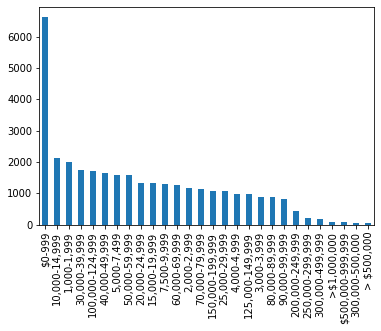

In [25]:
salary_counts = datacomb['Job_Salary'].value_counts()
salary_counts.plot(kind='bar')


In [26]:
def replace_text2(cell_value, replacements):
    if cell_value is not None and not pd.isna(cell_value):
        # Check if the cell_value is a float, and if so, convert it to a string.

        cell_value = str(cell_value)
        cell_value = replacements.get(cell_value,cell_value)
    return cell_value

In [27]:
salary_recat_dict = {
'$0-999': '$0 to $0.999K',
'1,000-1,999': '$1K to $9.999K',
'2,000-2,999': '$1K to $9.999K',
'3,000-3,999': '$1K to $9.999K',
'4,000-4,999': '$1K to $9.999K',
'5,000-7,499': '$1K to $9.999K',
'7,500-9,999': '$1K to $9.999K',
'10,000-14,999': '$10K to $49.999K',
'15,000-19,999': '$10K to $49.999K',
'20,000-24,999': '$10K to $49.999K',
'25,000-29,999': '$10K to $49.999K',
'30,000-39,999': '$10K to $49.999K',
'40,000-49,999': '$10K to $49.999K',
'50,000-59,999': '$50K to $79.999K',
'60,000-69,999': '$50K to $79.999K',
'70,000-79,999': '$50K to $79.999K',
'80,000-89,999': '$80K to $99.999K',
'90,000-99,999': '$80K to $99.999K',
'100,000-124,999': '$100K to $124.999K',
'125,000-149,999': '$125K to $149.999K',
'150,000-199,999': '$150K to $199.999K',
'200,000-249,999': '$200K to $299.999K',
'250,000-299,999': '$200K to $299.999K',
'300,000-499,999': '$300K to $500K',
'300,000-500,000': '$300K to $500K',
'$500,000-999,999': '>$500K',
'> $500,000': '>$500K',
'>$1,000,000': '>$1000K'}


In [28]:
datacomb['Job_Salary'].unique()

array([nan, '25,000-29,999', '100,000-124,999', '200,000-249,999',
       '150,000-199,999', '90,000-99,999', '30,000-39,999', '3,000-3,999',
       '50,000-59,999', '125,000-149,999', '15,000-19,999', '5,000-7,499',
       '10,000-14,999', '20,000-24,999', '$0-999', '7,500-9,999',
       '4,000-4,999', '80,000-89,999', '2,000-2,999', '250,000-299,999',
       '1,000-1,999', '$500,000-999,999', '70,000-79,999',
       '60,000-69,999', '40,000-49,999', '>$1,000,000', '300,000-499,999',
       '> $500,000', '300,000-500,000'], dtype=object)

In [29]:
datacomb['Job_Salary'] = datacomb['Job_Salary'].apply(replace_text2, replacements=salary_recat_dict)

In [30]:
datacomb['Job_Salary'].unique()

array([nan, '$10K to $49.999K', '$100K to $124.999K',
       '$200K to $299.999K', '$150K to $199.999K', '$80K to $99.999K',
       '$1K to $9.999K', '$50K to $79.999K', '$125K to $149.999K',
       '$0 to $0.999K', '>$500K', '>$1000K', '$300K to $500K'],
      dtype=object)

# Cleaning the 'Gender - Selected Choice' to replace non-man, non-women responses to NaN

In [31]:
Gender_dict = {'Prefer not to say': np.nan,
              'Nonbinary': np.nan,
              'Prefer to self-describe': np.nan}

In [32]:
datacomb['Gender - Selected Choice'] = datacomb['Gender - Selected Choice'].apply(replace_text2, replacements = Gender_dict)

In [33]:
datacomb.columns

Index(['Time spent on survey', 'Age', 'Gender - Selected Choice', 'Location',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Coursera',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - edX',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Kaggle Learn Courses',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - DataCamp',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Fast.ai',
       'Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udacity',
       ...
       'Popular data product brands used (Databases, Warehouses, Lakes) - Amazon Athena',
       'Popular BI tool brands - Einstein Analytics',
       'Popular auto ML product brand - H20 Driverless AI',
       'Popular auto ML 

In [34]:
datacomb.shape

(70006, 278)

In [35]:
cat_datacomb_cols = datacomb.select_dtypes(include = ['object']).columns

In [36]:
len(cat_datacomb_cols)

277

In [37]:
datacomb_new = datacomb.drop('Time spent on survey', axis = 1)
datacomb_new.head()

,Age,Gender - Selected Choice,Location,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Coursera,Learning platforms tried - How well known are the platforms (platforms with good marketing) - edX,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Kaggle Learn Courses,Learning platforms tried - How well known are the platforms (platforms with good marketing) - DataCamp,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Fast.ai,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udacity,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Udemy,Learning platforms tried - How well known are the platforms (platforms with good marketing) - LinkedIn Learning,"Learning platforms tried - How well known are the platforms (platforms with good marketing) - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",Learning platforms tried - How well known are the platforms (platforms with good marketing) - University Courses (resulting in a university degree),Learning platforms tried - How well known are the platforms (platforms with good marketing) - None,Learning platforms tried - How well known are the platforms (platforms with good marketing) - Other,Education level_attainedOrGGtoAttain,Coding Experience (in years),Popular programming language - Python,Popular programming language - R,Popular programming language - SQL,Popular programming language - C,Popular programming language - C#,Popular programming language - C++,Popular programming language - Java,Popular programming language - Javascript,Popular programming language - Bash,Popular programming language - PHP,Popular programming language - MATLAB,Popular programming language - Julia,Popular programming language - Go,Popular programming language - None,Popular programming language - Other,Popular IDEs - JupyterLab,Popular IDEs - RStudio,Popular IDEs - Visual Studio,Popular IDEs - Visual Studio Code (VSCode),Popular IDEs - PyCharm,Popular IDEs - Spyder,Popular IDEs - Notepad++,Popular IDEs - Sublime Text,Popular IDEs - Vim / Emacs,Popular IDEs - MATLAB,Popular IDEs - Jupyter Notebook,Popular IDEs - IntelliJ,Popular IDEs - None,Popular IDEs - Other,Popular hosted notebook products - Kaggle Notebooks,Popular hosted notebook products - Colab Notebooks,Popular hosted notebook products - Azure Notebooks,Popular hosted notebook products - Code Ocean,Popular hosted notebook products - IBM Watson Studio,Popular hosted notebook products - Amazon Sagemaker Studio,Popular hosted notebook products - Amazon Sagemaker Studio Lab,Popular hosted notebook products - Amazon EMR Notebooks,Popular hosted notebook products - Google Cloud Vertex AI Workbench,Popular hosted notebook products - Hex Workspaces,Popular hosted notebook products - Noteable Notebooks,Popular hosted notebook products - Databricks Collaborative Notebooks,Popular hosted notebook products - Deepnote Notebooks,Popular hosted notebook products - Gradient Notebooks,Popular hosted notebook products - None,Popular hosted notebook products - Other,Years in ML,Popular ML frameworks - Scikit-learn,Popular ML frameworks - TensorFlow,Popular ML frameworks - Keras,Popular ML frameworks - PyTorch,Popular ML frameworks - Fast.ai,Popular ML frameworks - Xgboost,Popular ML frameworks - LightGBM,Popular ML frameworks - CatBoost,Popular ML frameworks - Caret,Popular ML frameworks - Tidymodels,Popular ML frameworks - JAX,Popular ML frameworks - PyTorch Lightning,Popular ML frameworks - Huggingface,Popular ML frameworks - None,Popular ML frameworks - Other,Popular ML Algorithms - Linear or Logistic Regression,Popular ML Algorithms - Decision Trees or Random Forests,"Popular ML Algorithms - Gradient Boosting Machines (xgboost, lightgbm, etc)",Popular ML Algorithms - Bayesian Approaches,Popular ML Algorithms - Evolutionary Appr

In [38]:
col_w_other = [col for col in datacomb.columns if 'Other' in col]
col_w_other

['Learning platforms tried - How well known are the platforms (platforms with good marketing) - Other',
 'Popular programming language - Other',
 'Popular IDEs - Other',
 'Popular hosted notebook products - Other',
 'Popular ML frameworks - Other',
 'Popular ML Algorithms - Other',
 'Popular Computer Vision Methods - Other',
 'Popular NLP Methods - Other',
 'Job_JobScope - Other',
 'Popular Cloud Computing Platform Brand - Other',
 'Popular Cloud Computing Product Brand - Other',
 'Popular data product brands used (Databases, Warehouses, Lakes) - Other',
 'Popular BI tool brands - Other',
 'Popular ML product brand - Other',
 'Popular auto ML product brand - Other',
 'Popular tools to monitor ML/Experiments - Other',
 'Popular media sources for Data Science - Other']

In [39]:
col_w_none = [col for col in datacomb.columns if 'None' in col]
col_w_none

['Learning platforms tried - How well known are the platforms (platforms with good marketing) - None',
 'Popular programming language - None',
 'Popular IDEs - None',
 'Popular hosted notebook products - None',
 'Popular ML frameworks - None',
 'Popular ML Algorithms - None',
 'Popular Computer Vision Methods - None',
 'Popular NLP Methods - None',
 'Job_JobScope - None of these activities are an important part of my role at work',
 'Popular Cloud Computing Platform Brand - None',
 'Popular Cloud Computing Product Brand - No / None',
 'Popular data product brands used (Databases, Warehouses, Lakes) - None',
 'Popular BI tool brands - None',
 'Popular ML product brand - No / None',
 'Popular auto ML product brand - No / None',
 'Popular tools to monitor ML/Experiments - No / None',
 'Popular media sources for Data Science - None']

In [40]:
cols_to_remove = col_w_other + col_w_none

In [41]:
datacomb_new = datacomb_new.drop(columns = cols_to_remove, axis = 1)

In [42]:
len(datacomb_new.columns)

243

In [43]:
datacomb_new.shape

(70006, 243)

In [53]:
datacomb_new.columns.difference(datacomb_new.select_dtypes(include = ['object']).columns) # the only column that is not categorical is year

Index(['year'], dtype='object')

# Cleaning the 'Location' column

In [46]:
datacomb_new['Location'].unique()

array(['India', 'Algeria', 'Egypt', 'France', 'Germany', 'Australia',
       'Other', 'South Korea', 'United States of America', 'Pakistan',
       'Mexico', 'Singapore', 'Italy', 'Taiwan', 'China', 'Argentina',
       'Turkey', 'Brazil', 'Nigeria', 'Chile', 'Japan', 'Canada',
       'Indonesia', 'Israel', 'Colombia', 'Russia',
       'United Kingdom of Great Britain and Northern Ireland', 'Ethiopia',
       'South Africa', 'Viet Nam', 'Kenya', 'Spain',
       'Iran, Islamic Republic of...', 'Cameroon', 'Tunisia', 'Peru',
       'Nepal', 'Morocco', 'Philippines', 'Ecuador', 'Thailand',
       'United Arab Emirates', 'Bangladesh', 'Netherlands', 'Zimbabwe',
       'Ghana', 'Portugal', 'Poland', 'Saudi Arabia', 'Romania',
       'Czech Republic', 'Malaysia', 'Sri Lanka', 'Hong Kong (S.A.R.)',
       'Ukraine', 'I do not wish to disclose my location', 'Belgium',
       'Ireland', 'Greece', 'Switzerland', 'Sweden', 'Austria', 'Belarus',
       'Denmark', 'Uganda', 'Kazakhstan', 'Iraq', 'No

In [48]:
Location_dict = {'I do not wish to disclose my location': np.nan,
              'Other': np.nan}

In [55]:
datacomb_new['Location'] = datacomb_new['Location'].apply(replace_text, replacements=Location_dict)

In [56]:
datacomb_new['Location'].unique()

array(['India', 'Algeria', 'Egypt', 'France', 'Germany', 'Australia', nan,
       'South Korea', 'United States of America', 'Pakistan', 'Mexico',
       'Singapore', 'Italy', 'Taiwan', 'China', 'Argentina', 'Turkey',
       'Brazil', 'Nigeria', 'Chile', 'Japan', 'Canada', 'Indonesia',
       'Israel', 'Colombia', 'Russia',
       'United Kingdom of Great Britain and Northern Ireland', 'Ethiopia',
       'South Africa', 'Viet Nam', 'Kenya', 'Spain',
       'Iran, Islamic Republic of...', 'Cameroon', 'Tunisia', 'Peru',
       'Nepal', 'Morocco', 'Philippines', 'Ecuador', 'Thailand',
       'United Arab Emirates', 'Bangladesh', 'Netherlands', 'Zimbabwe',
       'Ghana', 'Portugal', 'Poland', 'Saudi Arabia', 'Romania',
       'Czech Republic', 'Malaysia', 'Sri Lanka', 'Hong Kong (S.A.R.)',
       'Ukraine', 'Belgium', 'Ireland', 'Greece', 'Switzerland', 'Sweden',
       'Austria', 'Belarus', 'Denmark', 'Uganda', 'Kazakhstan', 'Iraq',
       'Norway', 'Republic of Korea'], dtype=object)

In [57]:
datacomb_new['Location'].nunique()

67

# Writing datacomb to excel

In [49]:
# # writing the datacomb dataframe to excel
# datacomb.to_csv('data_allthreeyears_combined.csv', index=False)

In [58]:
# # writing the datacomb dataframe to excel
datacomb_new.to_csv('data_allthreeyears_combined_new1.csv', index=False)

# Some ordinal data need to be encoded to improve visualization (sorted axis values).

In [ ]:
included_columns = ['Age', 'Education level_attainedOrGGtoAttain', 'Coding Experience (in years)', 'Years in ML', 
                    'Job_Salary', 'Money Spent on ML/Cloud Computing', 'Times used TPU']
cols = [col for col in datacomb.columns if col in included_columns]

all = pd.DataFrame()
for col in cols:
    col_df = pd.DataFrame()
    col_df[col] = datacomb[col].unique()
    col_df[col+'_encoded'] = np.zeros(len(col_df[col]))
    all = pd.concat([all, col_df], axis=1)

all.to_csv('all_ans.csv')

# What happens after this is that we label the ordinal data based its intrinsic order
# For example, the ordinal data for education level is as follows:
# 1. No formal education past high school
# 2. Some college/university study without earning a bachelor’s degree
# 3. Bachelor’s degree
# 4. Master’s degree
# 5. Doctoral degree
# 6. Professional degree
# 7. I prefer not to answer
# the completed file will be used in the streamlit app